In [2]:
#xgboost算法

import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report

In [3]:
#生成2维正太分布，生成的数据按找分位数分为两类，500个样本，2个样本特征

x1,y1 = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)

x2,y2= make_gaussian_quantiles(mean=(3,3),n_samples=500, n_features=2, n_classes=2)

x_data = np.concatenate((x1,x2))
y_data = np.concatenate((y1, -y2+1))



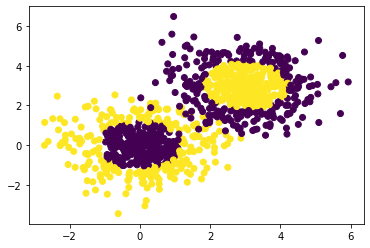

In [5]:
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [11]:
#决策树模型

model = tree.DecisionTreeClassifier(max_depth = 3)

model.fit(x_data, y_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
def plot_c(model):
    x_min, x_max =x_data[:, 0].min()-1, x_data[:, 0].max()+1
    y_min, y_max =x_data[:, 1].min()-1, x_data[:, 1].max()+1
    #生成网格矩阵
    xx,yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                                np.arange(y_min,y_max,0.02))
    # print(xx.shape)
    # print(xx.ravel().shape)

    z =model.predict(np.c_[xx.ravel(), yy.ravel()])
    # print(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    cs = plt.contourf(xx,yy,z)
    plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
    plt.show()

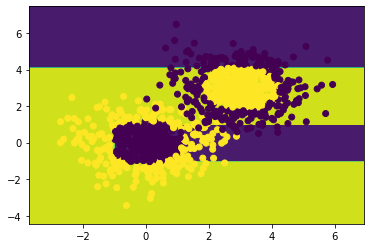

In [13]:
plot_c(model)


In [15]:
model.score(x_data,y_data)

0.773

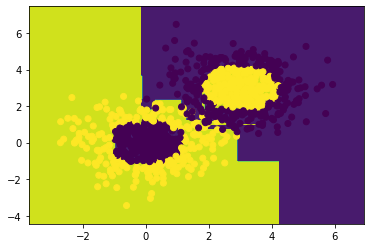

0.993

In [16]:
#Adaboost模型
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3), n_estimators=10)
model.fit(x_data,y_data)
plot_c(model)
model.score(x_data,y_data)